In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [53]:
# plt.style.use('fivethirtyeight')

In [54]:
filename = "../data/data.csv"

In [55]:
df = pd.read_csv(filename)

In [56]:
df.count()

datetime       9047
consumption    9047
dtype: int64

In [57]:
df.head()

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [58]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [59]:
df.isna().sum()

consumption    0
dtype: int64

In [60]:
min(df.consumption)

0.0

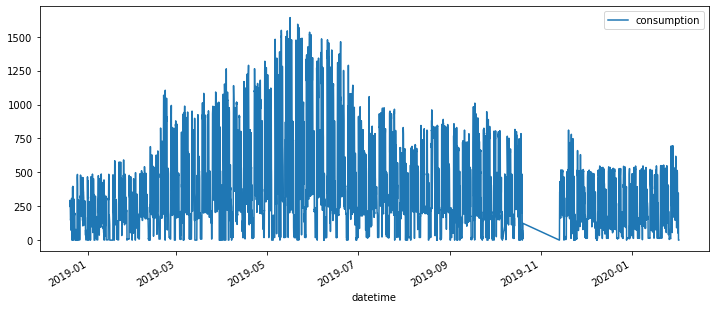

In [61]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [62]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1642.0
2019-05-16 11:00:01,1619.0
2019-05-21 15:00:02,1593.0
2019-05-21 16:00:02,1582.0
2019-05-22 14:00:02,1567.0
2019-05-22 15:00:02,1567.0
2019-05-22 12:00:01,1553.0
2019-05-22 13:00:02,1550.0
2019-05-10 15:00:02,1548.0


In [63]:
df = df.reset_index()

In [66]:
df.count()

ds    5
y     5
dtype: int64

## Changing dataframe format specific to Prophet Model

In [64]:
df = df.rename(columns={'datetime':'ds','consumption':'y'}).head()

In [65]:
df.count()

ds    5
y     5
dtype: int64

In [18]:
model = Prophet()

In [19]:
model.fit(df,algorithm='Newton')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


In [50]:
df.count()

consumption    9047
dtype: int64

In [23]:
p=model.predict(df)

In [30]:
p.size

65

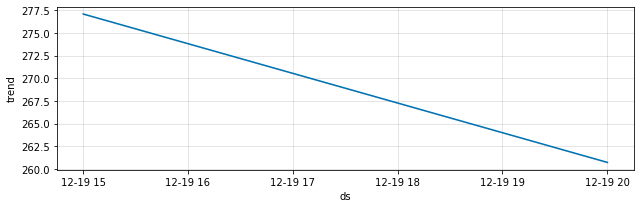

In [22]:
fig = model.plot_components(p)